https://www.datacamp.com/community/tutorials/scikit-learn-python

![Image of Yaktocat](http://img.blog.csdn.net/20180219180317194)

機器學習是一門設計如何讓演算法能夠學習的電腦科學，讓機器能夠透過觀察已知的資料學習預測未知的資料。典型的應用包含概念學習（Concept learning）、函數學習（Function learning）、預測模型（Predictive modeling）、分群（Clustering）與找尋預測特徵（Finding predictive patterns）。終極目標是讓電腦能夠自行提升學習能力，預測未知資料的準確性能夠隨著已知資料的增加而提高，節省使用者人工調整校正的精力。

機器學習跟知識發掘（Knowledge Discovery）、資料採礦（Data Mining）、人工智慧（Artificial Intelligence, AI）以及統計（Statistics）有著密不可分的關係，應用範圍從學術研究到商業應用，從機器人科學家到垃圾郵件篩選與推薦系統，都可見其蹤影。要成為一個優秀的資料科學家，機器學習是不可或缺的技能，這份教學會從零開始介紹如何使用 Python 來實作機器學習，並且示範如何使用一些非監督式與監督式的機器學習演算法。

In [14]:
# 首先由 sklearn 套件載入 datasets 模組
from sklearn import datasets

# 然後使用 datasets 模組的 load_digits() 方法來輸入資料
digits = datasets.load_digits()

# Print the `digits` data 
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [25]:
# Import the `pandas` library as `pd`
import pandas as pd

# 從加州大學 Irvine 分校的機器學習資料集載入 digits
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

# Print out `digits`
digits

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3820,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3821,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


值得注意的是，從檔名的 .tra 與 .tes 可以得知，加州大學 Irvine 分校的機器學習資料集已經切分好訓練與測試資料，而上面這段程式中我們只讀入了訓練資料，如果要實作機器學習則還需要再讀入測試資料，

### 探索資料
仔細閱讀資料的文件或描述是很好的習慣，加州大學 Irvine 分校的機器學習資料集針對每個資料都有提供文件，閱讀文件可以提高我們對資料的瞭解程度。然而光是初步認識還是略嫌不足，接著我們要進行的是探索性分析（Exploratory data analysis），我們又該從何開始探索這些手寫數字圖片資料呢？

### 搜集基本資訊
假如我們直接透過 scikit-learn 讀入 digits 資料，那麼不同於加州大學 Irvine 分校的機器學習資料集在網頁中提供描述或文件，我們必須另外透過使用 digits 的屬性與方法來搜集基本資訊。

In [26]:
# Get the keys of the `digits` data
# 透過 digits 的 keys() 方法來得知有哪些基本資訊可以搜集
print(digits.keys())

# Print out the data
# 透過 data 屬性觀察預測變數；
print(digits.data)

# Print out the target values
# 透過 target 屬性觀察目標變數
print(digits.target)

# Print out the description of the `digits` data
# 透過 DESCR 屬性閱讀資料的描述文件。
print(digits.DESCR)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
           dtype='int64')


AttributeError: 'DataFrame' object has no attribute 'data'

接著我們回憶一下在第一個練習中印出的 digits，裡頭出現很多的 numpy 陣列，了解陣列最重要的特性是形狀（shape）。假如我們有一個 3d 陣列：y = np.zeros((2, 3, 4))，這個陣列的形狀就是 (2,3,4)，由整數組成的 tuple 資料結構。

我們延續前一個練習來觀察 data、target、DESCR 與 images 的形狀，利用 digits 的 data 屬性將這個陣列獨立指派給 digits_data 並檢視其 shape 屬性，並且對另外三個屬性也依樣畫葫蘆進行相同的操作，試著依照註解的提示完成程式後點選 Run 觀察結果，如果沒有頭緒，可以點選 Solution 將程式完成後再點選 Run 觀察結果：

In [27]:
# Isolate the `digits` data
digits_data = digits.data

# Inspect the shape
print(digits_data.shape)

# Isolate the target values with `target`
digits_target = digits.target

# Inspect the shape
print(digits_target.shape)

# Print the number of unique labels
number_digits = len(np.unique(digits.target))

# Isolate the `images`
digits_images = digits.images

# Inspect the shape
print(digits_images.shape)

AttributeError: 'DataFrame' object has no attribute 'data'

我們在這小結一下，檢視 digits.data.shape 可以得知資料有 1,797 個觀測值，64 個變數，檢視 digits.target.shape 可以得知資料有 1,797 個目標值（或稱標籤值），而檢視 len(np.unique(digits.target)) 可以得知所有的目標值只有 10 個相異值：0 到 9，意即我們的模型是要辨識手寫數字圖片是 0 到 9 中的哪一個數字。

最後是 digits.images 的三個維度：1,797 個 8 x 8 像素的矩陣，我們可以進一步將 digits.images 轉換（reshape）為兩個維度，並且使用 numpy 的 all() 方法比較陣列內的元素是否與 digits.data 完全相同：print(np.all(digits.images.reshape((1797,64)) == digits.data))，而我們會得到 True 的結果。

# 使用 matplotlib 視覺化手寫數字圖片
接下來我們要使用 Python 的資料視覺化套件 matplotlib 來視覺化這些手寫數字圖片：

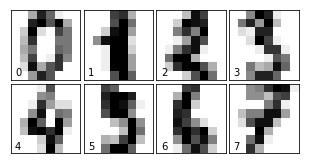

In [29]:
# 從 `sklearn` 載入 `datasets`
from sklearn import datasets
# 載入 matplotlib
import matplotlib.pyplot as plt

# 載入 `digits`
digits = datasets.load_digits()

# 設定圖形的大小（寬, 高）
fig = plt.figure(figsize=(4, 2))

# 調整子圖形參數
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 把前 8 個手寫數字顯示在子圖形
for i in range(8):
    # 在 2 x 4 網格中第 i + 1 個位置繪製子圖形，並且關掉座標軸刻度
    ax = fig.add_subplot(2, 4, i + 1, xticks = [], yticks = [])
    # 顯示圖形，色彩選擇灰階
    ax.imshow(digits.images[i], cmap = plt.cm.binary)
    # 在左下角標示目標值
    ax.text(0, 7, str(digits.target[i]))

# 顯示圖形
plt.show()

In [ ]:
或者採取這段較簡潔的程式：

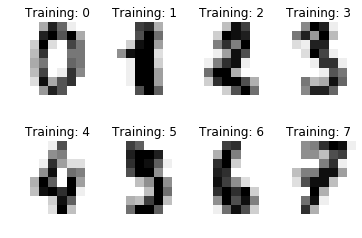

In [30]:
# 從 `sklearn` 載入 `datasets`
from sklearn import datasets
# 載入 matplotlib
import matplotlib.pyplot as plt

# 載入 `digits`
digits = datasets.load_digits()

# 將觀測值與目標值放入一個 list
images_and_labels = list(zip(digits.images, digits.target))

# list 中的每個元素
for i, (image, label) in enumerate(images_and_labels[:8]):
    # 在 i + 1 的位置初始化子圖形
    plt.subplot(2, 4, i + 1)
    # 關掉子圖形座標軸刻度
    plt.axis('off')
    # 顯示圖形，色彩選擇灰階
    plt.imshow(image, cmap = plt.cm.binary)
    # 加入子圖形的標題
    plt.title('Training: ' + str(label))

# 顯示圖形
plt.show()

在這個例子中，我們將兩個陣列存入 images_and_labels 這個變數，然後將這個變數中的前 8 個元素（包含 digits.images 與相對應的 digits.target）在一個 2 x 4 的格線上繪製子圖形，並且使用 plt.cm.binary 這個灰階色彩，搭配子圖形標題顯示出來。
經過這兩個視覺化練習之後，您應該對目前手上處理的 digits 資料有更深的認識！

# 視覺化：主成份分析（Principal Component Analysis, PCA）
digits 資料有 64 個變數，面對這種高維度的資料（實務上還有其他很多像是財務或者氣候資料也都屬於高維度資料），我們需要用一些方法找出特別重要的二到三個變數，或者將許多的變數組合成讓我們更容易理解且視覺化的幾個維度。

這種方法稱作降維（Dimensionality Reduction），我們接著要使用其中一種方法稱為：主成份分析（Principal Component Analysis, PCA）來協助我們視覺化 digits 資料。主成份分析的精神在於找出變數之間的線性關係組成新的一個主成份，然後使用這個主成份取代原有的變數，屬於一種最大化資料變異性的線性轉換方法，如果您想了解更多，可以參閱這個連結。

我們可以透過 scikit-learn 輕鬆對 digits 資料實作主成份分析

In [31]:
# Create a Randomized PCA model that takes two components
randomized_pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
print("Shape of reduced_data_pca:", reduced_data_pca.shape)
print("---")

# Print out the data
print("RPCA:")
print(reduced_data_rpca)
print("---")
print("PCA:")
print(reduced_data_pca)

NameError: name 'RandomizedPCA' is not defined

In [32]:
from sklearn import datasets
digits = datasets.load_digits()
import matplotlib.pyplot as plt

colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

NameError: name 'reduced_data_rpca' is not defined